# Expore Data Analysis (EDA) for OCPR

### Data Overview:
Explore basic features of data e.g. ranges, averages, and distributions.

#### Trend Analysis:
Yearly Trends: Compare the revenue for each month across the three years to assess whether the business is growing, stagnating, or declining.
Monthly Trends: Analyze how revenue trends within each year to see if there are any particular patterns or peaks and troughs during the summer.
Trends in aggregate and across parks....

#### Seasonal Analysis:
Monthly comparisons: Since you have data specifically for June, July, and August, you can look into which month consistently performs best, and investigate what might be driving higher revenues during that period.

#### Day of the Week Analysis:
If data allows, analyze which days of the week are most profitable. This can help optimize staffing and marketing strategies.

#### Weather Impact Analysis (if weather data is available):
Correlate weather conditions with revenue performance, as weather can significantly impact facility usage.

#### Event Impact Analysis:
If any special events or promotions were held during these months, analyze their impact on revenue. This can help in planning future events or promotions more effectively. Focus on holidays.

In [135]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as stats

In [136]:
# Path to processed data
file_path_base = Path('../data/processed/')

# Read in processed data files
weather = pd.read_csv(file_path_base / 'weather.csv')
parks_data = pd.read_csv(file_path_base / 'parks-data-long.csv')
parks_data.head()

,date,park_name,facility,variable,value
0,2022-06-01,Groveland Oaks,campground,campers,9
1,2022-06-01,Addison Oaks,campground,campers,10
2,2022-06-01,Groveland Oaks,campground,revenue,108
3,2022-06-01,Addison Oaks,campground,revenue,80
4,2022-06-01,Springfield Oaks,golf,revenue,1184


In [230]:
def filter_and_pivot(df: pd.DataFrame, facility: str) -> pd.DataFrame:
    """
    Filter parks data by facility type and pivot so revenu and visitors are separate column
    """
    return (df
            .loc[lambda x: x['facility'] == facility]
            .assign(date=lambda x: pd.to_datetime(x['date']))
            .pivot(index=['date', 'park_name'], columns='variable', values='value')
            .reset_index()
    )



# Golf Analysis

In [232]:
# Create golf dataframe
golf = filter_and_pivot(parks_data, 'golf')

In [238]:
# Create golf dataframes for different time periods
golf.set_multi_index(['park_name', 'date']).groupby('park_name').cumsum()


AttributeError: 'DataFrame' object has no attribute 'set_multi_index'

In [222]:
golf

variable,park_name,revenue,rounds played,month,year
date,,,,,
2022-06-01,Glen Oaks,1248,32,June,2022
2022-06-01,Springfield Oaks,1184,37,June,2022
2022-06-02,Glen Oaks,1344,42,June,2022
2022-06-02,Springfield Oaks,1485,45,June,2022
2022-06-03,Glen Oaks,962,26,June,2022
...,...,...,...,...,...
2024-08-29,Springfield Oaks,1330,35,August,2024
2024-08-30,Glen Oaks,1050,35,August,2024
2024-08-30,Springfield Oaks,875,25,August,2024


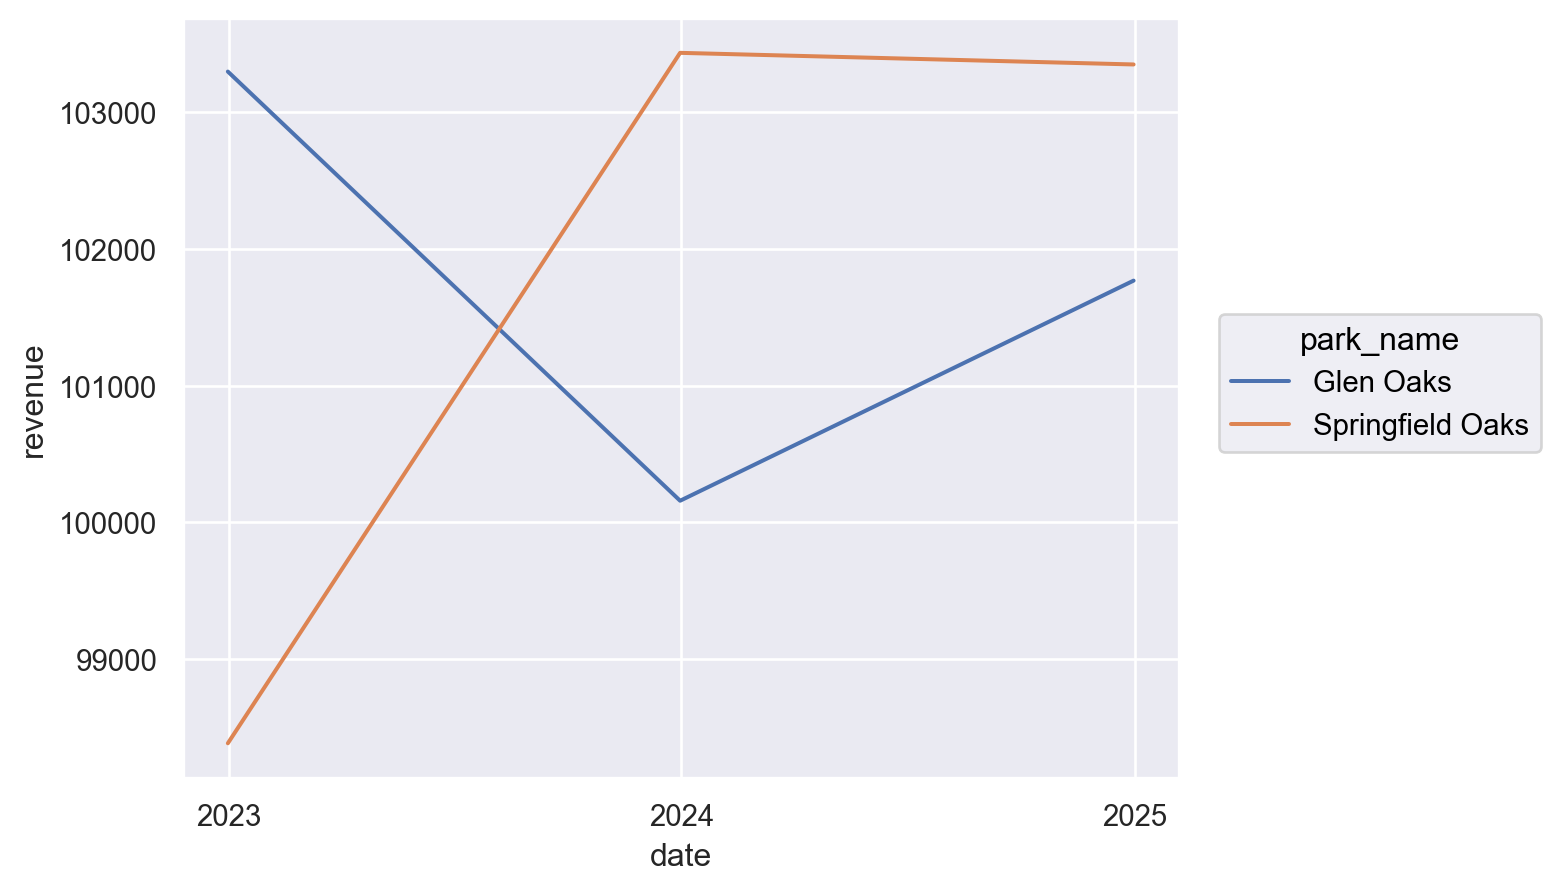

In [194]:
(golf_yearly
 .pipe(so.Plot, x='date', y='revenue', color='park_name')
 .add(so.Line())
)

In [195]:
golf_yearly

variable                     revenue  rounds played    year
park_name        date                                      
Glen Oaks        2022-12-31   103298           2936  186024
                 2023-12-31   100159           2891  186116
                 2024-12-31   101769           2910  186208
Springfield Oaks 2022-12-31    98385           2809  186024
                 2023-12-31   103435           2940  186116
                 2024-12-31   103350           2943  186208